In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('credit_card_transactions.csv')

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [24]:
input_cols = ['amt', 'transaction_hour', 'transaction_day', 'transaction_day_of_week',
              'unix_time', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'cc_num', 'gender', 
              'distance', 'merch_zipcode', 'zip']

In [25]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [26]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


## Get Sample

In [27]:
# Get sample of the data
pd.set_option('display.max_columns', None)

# Reset index after sampling
#data = df.reset_index(drop=True)


In [28]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract additional time features
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
data['transaction_day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['transaction_day'] = data['trans_date_trans_time'].dt.day


In [29]:
# Check for missing values
print(data.isnull().sum())

# For numerical columns, you can fill missing values with the mean or median
data['amt'] = data['amt'].fillna(data['amt'].mean())
data['merch_zipcode'] = data['merch_zipcode'].fillna(data['merch_zipcode'].median())

# For categorical columns, fill with the most frequent value or drop if necessary
data['category'] = data['category'].fillna(data['category'].mode()[0])
data['merchant'] = data['merchant'].fillna(data['merchant'].mode()[0])
data['job'] = data['job'].fillna(data['job'].mode()[0])
data['state'] = data['state'].fillna(data['state'].mode()[0])

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                            0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
merch_zipcode              48911
transaction_hour               0
transaction_day_of_week        0
transaction_day                0
dtype: int64


### Categorical Column Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

# For gender (binary category)
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  # F -> 0, M -> 1

# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['merchant', 'category', 'job', 'state'], drop_first=True)

In [31]:
categorical_cols = ['merchant', 'category', 'job', 'state']

### Feature Engineering

In [32]:
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (pd.to_datetime('today') - data['dob']).dt.days // 365


In [33]:
# Haversine formula to calculate distance between two lat/long points in miles
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in miles
    R = 3958.8
    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Vectorized calculation of distances
def calculate_distance_vectorized(data):
    data['distance'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])
    return data

# Example usage
data = calculate_distance_vectorized(data)


### Scaling Numerical Features

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 
                     'distance', 'age', 'zip', 'merch_zipcode', 'cc_num', 'transaction_hour', 
                     'transaction_day_of_week', 'transaction_day']

# Apply StandardScaler to normalize the numerical features
scaler = MinMaxScaler(feature_range=(0,1))
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [35]:
data

Unnamed: 0 trans_date_trans_time        cc_num       amt    first  \
1045211     1045211   2020-03-09 15:09:26  1.035931e-07  0.006685    James   
547406       547406   2019-08-22 15:49:01  6.072460e-06  0.001773  Cynthia   
110142       110142   2019-03-04 01:34:16  9.331144e-04  0.000191     Tara   
1285953     1285953   2020-06-16 20:04:38  7.040451e-04  0.000219   Steven   
271705       271705   2019-05-14 05:54:48  1.204107e-03  0.002186  Kristen   
...             ...                   ...           ...       ...      ...   
296952       296952   2019-05-25 19:55:55  7.124010e-04  0.000244     Jose   
1185255     1185255   2020-05-10 13:39:30  7.033403e-04  0.012486    James   
79579         79579   2019-02-17 01:00:56  7.072966e-04  0.002874   Shelby   
1278984     1278984   2020-06-15 02:05:50  6.828321e-05  0.002246    Tyler   
67019         67019   2019-02-09 17:11:37  4.579362e-04  0.000992   Morgan   

               last  gender                        street           city  \
1045211  Strickland       1            25454 Leonard Lake  Spring Church   
547406        Davis       0            7177 Steven Forges          Sixes   
110142     Richards       0         4879 Cristina Station   Keisterville   
1285953    Faulkner       1  841 Cheryl Centers Suite 115     Farmington   
271705        Allen       0     8619 Lisa Manors Apt. 871       Lagrange   
...             ...     ...                           ...            ...   
296952      Vasquez       1           572 Davis Mountains   Lake Jackson   
1185255      Cooper       1    663 Ramirez Trace Apt. 951     Huntsville   
79579      Mitchell       0              974 Cindy Stream        Brandon   
1278984      Wright       1    615 Clarke Spring Apt. 172         Warren   
67019        Murray       0          2788 Brittney Island     Blairstown   

              zip       lat      long  city_pop        dob  \
1045211  0.146449  0.441180  0.882276  0.000326 1997-10-23   
547406   0.976585  0.488531  0.421925  0.000067 1928-10-01   
110142   0.144043  0.427215  0.878891  0.000055 1945-11-04   
1285953  0.133650  0.491381  0.904239  0.003679 1952-10-13   
271705   0.821753  0.463187  0.629079  0.000211 1973-07-13   
...           ...       ...       ...       ...        ...   
296952   0.774506  0.193121  0.718694  0.009879 1999-12-27   
1185255  0.350709  0.316113  0.809731  0.065420 1973-04-01   
79579    0.045430  0.509564  0.947423  0.002020 1975-07-13   
1278984  0.475316  0.481918  0.846167  0.046112 1980-05-18   
67019    0.644185  0.396535  0.734228  0.000153 1950-05-27   

                                trans_num  unix_time  merch_lat  merch_long  \
1045211  fff87d4340ef756a592eac652493cf6b   0.806742   0.441222    0.880551   
547406   d0ad335af432f35578eea01d639b3621   0.436567   0.489456    0.431488   
110142   87f26e3ea33f4ff4c7a8bad2c7f48686   0.117328   0.442351    0.880218   
1285953  9c34015321c0fa2ae6fd20f9359d1d3e   0.991306   0.510261    0.903847   
271705   198437c05676f485e9be04449c664475   0.249756   0.454010    0.627517   
...                                   ...        ...        ...         ...   
296952   ec7d96ee655312f50d515caf218240e3   0.271307   0.225131    0.711188   
1185255  9327e011b7458d54206020110af121cb   0.921973   0.342873    0.795273   
79579    27c6b7ae82475bd2b15366cbf240265d   0.087518   0.506074    0.940775   
1278984  c3afe476f2d1ee4016a40268dbacb703   0.988052   0.489670    0.842226   
67019    adc758d5b0332c5684f52620b1c8552c   0.073889   0.398157    0.721844   

         is_fraud  merch_zipcode  transaction_hour  transaction_day_of_week  \
1045211         0       0.151501          0.652174                 0.000000   
547406          0       0.455783          0.652174                 0.500000   
110142          0       0.152029          0.043478                 0.000000   
1285953         0       0.455783          0.869565                 0.166667   
271705          0       0.823977          0.217391                 0.1

### Splitting and Prep-ing

In [36]:
# Create a copy of the original data to preserve all columns
data_original = data.copy()

# List of columns you want to exclude during training
exclude_columns = ['first', 'last', 'street', 'city', 'dob', 'trans_num', 'trans_date_trans_time', 'Unnamed: 0']

# Drop irrelevant columns
data = data.drop(exclude_columns, axis=1)

In [37]:
data

cc_num       amt  gender       zip       lat      long  \
1045211  1.035931e-07  0.006685       1  0.146449  0.441180  0.882276   
547406   6.072460e-06  0.001773       0  0.976585  0.488531  0.421925   
110142   9.331144e-04  0.000191       0  0.144043  0.427215  0.878891   
1285953  7.040451e-04  0.000219       1  0.133650  0.491381  0.904239   
271705   1.204107e-03  0.002186       0  0.821753  0.463187  0.629079   
...               ...       ...     ...       ...       ...       ...   
296952   7.124010e-04  0.000244       1  0.774506  0.193121  0.718694   
1185255  7.033403e-04  0.012486       1  0.350709  0.316113  0.809731   
79579    7.072966e-04  0.002874       0  0.045430  0.509564  0.947423   
1278984  6.828321e-05  0.002246       1  0.475316  0.481918  0.846167   
67019    4.579362e-04  0.000992       0  0.644185  0.396535  0.734228   

         city_pop  unix_time  merch_lat  merch_long  is_fraud  merch_zipcode  \
1045211  0.000326   0.806742   0.441222    0.880551         0       0.151501   
547406   0.000067   0.436567   0.489456    0.431488         0       0.455783   
110142   0.000055   0.117328   0.442351    0.880218         0       0.152029   
1285953  0.003679   0.991306   0.510261    0.903847         0       0.455783   
271705   0.000211   0.249756   0.454010    0.627517         0       0.823977   
...           ...        ...        ...         ...       ...            ...   
296952   0.009879   0.271307   0.225131    0.711188         0       0.776732   
1185255  0.065420   0.921973   0.342873    0.795273         0       0.380612   
79579    0.002020   0.087518   0.506074    0.940775         0       0.048139   
1278984  0.046112   0.988052   0.489670    0.842226         0       0.478273   
67019    0.000153   0.073889   0.398157    0.721844         0       0.660952   

         transaction_hour  transaction_day_of_week  transaction_day  \
1045211          0.652174                 0.000000         0.266667   
547406           0.652174                 0.500000         0.700000   
110142           0.043478                 0.000000         0.100000   
1285953          0.869565                 0.166667         0.500000   
271705           0.217391                 0.166667         0.433333   
...                   ...                      ...              ...   
296952           0.826087                 0.833333         0.800000   
1185255          0.565217                 1.000000         0.300000   
79579            0.043478                 1.000000         0.533333   
1278984          0.086957                 0.000000         0.466667   
67019            0.739130                 0.833333         0.266667   

         merchant_fraud_Abbott-Steuber  merchant_fraud_Abernathy and Sons  \
1045211                          False                              False   
547406                           False                              False   
110142                           False                              False   
1285953                          False                              False   
271705                           False                              False   
...                                ...                                ...   
296952                           False                              False   
1185255                          False                              False   
79579                            False                              False   
1278984                          False                              False   
67019                            False                              False   

         merchant_fraud_Abshire PLC  \
1045211                       False   
547406                        False   
110142                        False   
1285953                       False   
271705                        False   
...                             ...   
296952                        False   
1185255                       False   
79579                         False   
1278984  

In [38]:
# Split data_half into features (X) and target (y)
X = data.drop('is_fraud', axis=1)[input_cols]
y = data['is_fraud']

target_cols = ['is_fraud']

In [43]:
y

1045211    0
547406     0
110142     0
1285953    0
271705     0
          ..
296952     0
1185255    0
79579      0
1278984    0
67019      0
Name: is_fraud, Length: 324169, dtype: int64

### Principal Component Analysis

In [27]:
from sklearn.decomposition import PCA

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # This will keep enough components to explain 95% of the variance
X_pca = pca.fit_transform(X)


In [ ]:
print(pca.explained_variance_ratio_)  # Prints the variance explained by each component
print(sum(pca.explained_variance_ratio_))  # Total variance explained by the selected components


### Oversampling Using Smote

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=1)

X_smote, y_smote = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", dict(zip(*np.unique(y_smote, return_counts=True))))

Class distribution after SMOTE: {0: 322285, 1: 322285}


In [47]:
#'is_fraud' is your target variable
from sklearn.model_selection import train_test_split

# Split into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Further split the training set into training and validation (e.g., 10% of training for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### Model Training and Report

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the model
model = RandomForestClassifier(random_state=2, class_weight='balanced')

# Train the model on the training set
model.fit(X_train[input_cols], y_train)

RandomForestClassifier(class_weight='balanced', random_state=2)

In [49]:
# Validate the model on the validation set
y_val_pred = model.predict(X_val[input_cols])
print("Validation Results:")
print(classification_report(y_val, y_val_pred))

Validation Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22507
           1       0.99      1.00      1.00     22613

    accuracy                           1.00     45120
   macro avg       1.00      1.00      1.00     45120
weighted avg       1.00      1.00      1.00     45120



In [50]:
# Test the model on the test set
y_test_pred = model.predict(X_test[input_cols])
print("Test Results:")
print(classification_report(y_test, y_test_pred))

Test Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     96586
           1       0.99      1.00      1.00     96785

    accuracy                           1.00    193371
   macro avg       1.00      1.00      1.00    193371
weighted avg       1.00      1.00      1.00    193371



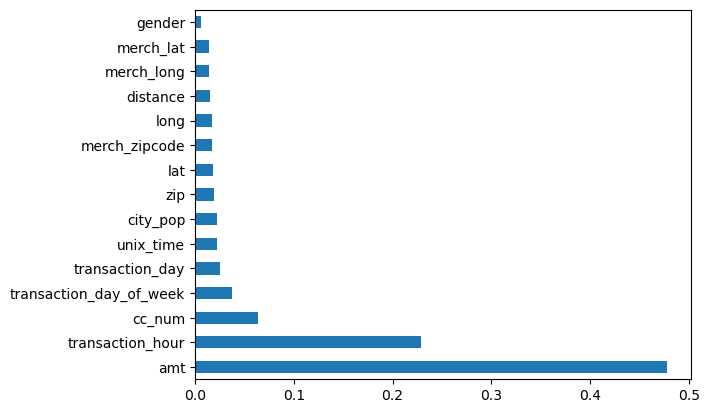

In [51]:
model.feature_importances_
feat_importances = pd.Series(model.feature_importances_,\
                             index=input_cols)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

### Saving the Model

In [57]:
import joblib

CSN_map = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'numeric_cols' : numerical_columns,
    'categorical_cols' : categorical_cols,
    'target_cols' : target_cols,
    }

joblib.dump(CSN_map, 'CSN_map')

['CSN_map']

In [2]:
import joblib

# Load the data from a joblib file
data = joblib.load('CSN_map')

# Now you can use the loaded data
print(data)


/home/okore-joel/ml_env/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/okore-joel/ml_env/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/okore-joel/ml_env/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when usin

AttributeError: 'RandomForestClassifier' object has no attribute 'monotonic_cst'

## Automating Functions

In [118]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [119]:
# 1. Datetime Feature Extraction
def extract_time_features(data):
    data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
    data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
    data['transaction_day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
    data['transaction_day'] = data['trans_date_trans_time'].dt.day
    return data

In [120]:
# 2. Handling Missing Values
def handle_missing_values(data):
    # Fill numerical columns
    data['amt'] = data['amt'].fillna(data['amt'].mean())
    data['merch_zipcode'] = data['merch_zipcode'].fillna(data['merch_zipcode'].median())
    # Fill categorical columns
    data['category'] = data['category'].fillna(data['category'].mode()[0])
    return data

In [121]:
# 3. Encoding Categorical Variables
def encode_categorical(data):
    le = LabelEncoder()
    data['gender'] = le.fit_transform(data['gender'])  # F -> 0, M -> 1
    data = pd.get_dummies(data, columns=['category', 'job', 'state'], drop_first=True)
    return data


In [122]:
# 4. Feature Engineering: Calculate Age and Distance
def calculate_age_and_distance(data):
    data['dob'] = pd.to_datetime(data['dob'])
    data['age'] = (pd.to_datetime('today') - data['dob']).dt.days // 365
    
    def calculate_distance(row):
        cardholder_location = (row['lat'], row['long'])
        merchant_location = (row['merch_lat'], row['merch_long'])
        return geodesic(cardholder_location, merchant_location).miles

    data['distance'] = data.apply(calculate_distance, axis=1)
    return data

In [123]:
# 5. Scaling Numerical Features
def scale_numerical_features(data, numerical_columns):
    scaler = StandardScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    return data

In [124]:
# 6. Train-Test Split
def split_data(data, target_column, test_size=0.2, val_size=0.1):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [125]:
# 7. Model Training, Validation, and Testing
def train_and_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Validation
    y_val_pred = model.predict(X_val)
    print("Validation Results:")
    print(classification_report(y_val, y_val_pred))
    
    # Test
    y_test_pred = model.predict(X_test)
    print("Test Results:")
    print(classification_report(y_test, y_test_pred))

In [126]:
data = extract_time_features(data)
data = handle_missing_values(data)
data = encode_categorical(data)
data = calculate_age_and_distance(data)

KeyError: 'category'

In [128]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,zip,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,transaction_hour,transaction_day_of_week,transaction_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"jo

In [ ]:
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'distance', 'age']
data = scale_numerical_features(data, numerical_columns)

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, 'is_fraud')

In [60]:
X_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,zip,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,merch_zipcode,transaction_hour,transaction_day_of_week,transaction_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor,

In [ ]:
# Train the model and evaluate it
train_and_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test)

In [127]:
# Utility function to time other functions
def time_function(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    print(f"Time taken by {func.__name__}: {end_time - start_time:.4f} seconds")
    return result


# Main function to run all steps with timing
def preprocess_and_train(data, target_column='is_fraud'):
    # Time each function call
    data = time_function(extract_time_features, data)
    data = time_function(handle_missing_values, data)
    data = time_function(encode_categorical, data)
    data = time_function(calculate_age_and_distance, data)
    